In [518]:
import pandas as pd
import numpy as np

In [519]:
train=pd.read_csv('train.csv',usecols=['id','budget','genres','original_language','popularity','production_companies',
                                       'production_countries','runtime','spoken_languages','revenue','Keywords'])
test=pd.read_csv('test.csv',usecols=['id','budget','genres','original_language','popularity','production_companies',
                                       'production_countries','runtime','spoken_languages','Keywords'])

In [520]:
train.head()

,id,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,Keywords,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",93.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 4379, 'name': 'time travel'}, {'id': 9...",12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",113.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 2505, 'name': 'coronation'}, {'id': 42...",95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",13092000
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",16000000
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",NaN,3923970


In [521]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import itertools



train['runtime']=pd.to_numeric(train['runtime'], errors='ignore')
test['runtime']=pd.to_numeric(test['runtime'], errors='ignore')


In [522]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1542,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture

In [523]:
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

In [524]:
# TRAIN 

train.runtime[train.id == 391] = 86 #Il peor natagle de la meva vida
train.runtime[train.id == 592] = 90 #А поутру они проснулись
train.runtime[train.id == 925] = 95 #¿Quién mató a Bambi?
train.runtime[train.id == 978] = 93 #La peggior settimana della mia vita
train.runtime[train.id == 1256] = 92 #Cipolla Colt
train.runtime[train.id == 1542] = 93 #Все и сразу
train.runtime[train.id == 1875] = 86 #Vermist
train.runtime[train.id == 2151] = 108 #Mechenosets
train.runtime[train.id == 2499] = 108 #Na Igre 2. Novyy Uroven
train.runtime[train.id == 2646] = 98 #同桌的妳
train.runtime[train.id == 2786] = 111 #Revelation
train.runtime[train.id == 2866] = 96 #Tutto tutto niente niente

# TEST
test.runtime[test.id == 4074] = 103 #Shikshanachya Aaicha Gho
test.runtime[test.id == 4222] = 93 #Street Knight
test.runtime[test.id == 4431] = 100 #Плюс один
test.runtime[test.id == 5520] = 86 #Glukhar v kino
test.runtime[test.id == 5845] = 83 #Frau Müller muss weg!
test.runtime[test.id == 5849] = 140 #Shabd
test.runtime[test.id == 6210] = 104 #Le dernier souffle
test.runtime[test.id == 6804] = 145 #Chaahat Ek Nasha..
test.runtime[test.id == 7321] = 87 #El truco del manco

In [525]:
all_languages = pd.concat([train.original_language, test.original_language], axis=0).value_counts()
all_languages[all_languages > 10]

en    6351
fr     199
hi     118
ru     109
es      95
ja      90
it      56
ko      49
de      49
zh      46
cn      41
ta      31
sv      20
da      17
pt      13
ml      12
nl      11
Name: original_language, dtype: int64

In [526]:
# Here are the main languages
main_languages = list(all_languages[all_languages>20].index)
# Let's categorize them, and add a 'other' catergorie
dict_language = dict(zip(main_languages, range(1, len(main_languages)+1)))
dict_language['other'] = 0

#keep only the languages that are on main_languages
train.original_language = train.original_language.apply(lambda x: x if x in main_languages else 'other')
test.original_language = test.original_language.apply(lambda x: x if x in main_languages else 'other')

#put languages to numeric according to the indexes of the dictionary
train['language'] = train.original_language.apply(lambda x: dict_language[x])
test['language'] = test.original_language.apply(lambda x: dict_language[x])

In [527]:
import ast

# Apply the same preprocessing on the string values
train.genres = train.genres.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
test.genres = test.genres.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))

train.genres.head()


#ast.literal_eval is used to find tree type string , map takes in two variable ast.literal_eval(x) is the string on which

# lambda d: list(d.values())[1] is performed , list is used to display the value of this output, isinstance matches if the variable

# x is string or not 

0                            [Comedy]
1    [Comedy, Drama, Family, Romance]
2                             [Drama]
3                   [Thriller, Drama]
4                  [Action, Thriller]
Name: genres, dtype: object

In [528]:
from collections import Counter

genres = Counter(itertools.chain.from_iterable(pd.concat((train.genres, test.genres), axis=0).values))

In [529]:
for g in genres:
    train[g] = train.genres.apply(lambda x: 1 if g in x else 0)
    test[g] = test.genres.apply(lambda x: 1 if g in x else 0)

In [530]:
train['spoken_languages'] = train['spoken_languages'].apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))
test['spoken_languages'] = test['spoken_languages'].apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))



In [531]:
#adding a parameter of length of the variable for the model

train['nb_spoken_languages'] = train.spoken_languages.apply(len)
test['nb_spoken_languages'] = test.spoken_languages.apply(len)


#this results true if english spoken and false if not 

train['english_spoken'] = train.spoken_languages.apply(lambda x: 'en' in x)
test['english_spoken'] = test.spoken_languages.apply(lambda x: 'en' in x)




In [532]:



train.production_companies = train.production_companies.apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))
test.production_companies = test.production_companies.apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))

production_companies = Counter(itertools.chain.from_iterable(pd.concat((train.production_companies, test.production_companies), axis=0).values))




train['nb_production_companies'] = train.production_companies.apply(len)
test['nb_production_companies'] = test.production_companies.apply(len)



In [533]:
# Factorizing all the little production companies into an 'other' variable
big_companies = [p for p in production_companies if production_companies[p] > 30]
train.production_companies = train.production_companies.apply(lambda l: list(map(lambda x: x if x in big_companies else 'other', l)))

for p in big_companies + ['other']:
    train[p] = train.production_companies.apply(lambda x: 1 if p in x else 0)
    test[p] = test.production_companies.apply(lambda x: 1 if p in x else 0)

In [534]:
train.production_countries = train.production_countries.apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))
test.production_countries = test.production_countries.apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))


production_countries = Counter(itertools.chain.from_iterable(pd.concat((train.production_countries, test.production_countries), axis=0).values))
print("Number of different production companies:", len(production_countries))

Number of different production companies: 98


In [535]:
# Factorizing all the little production companies into an 'other' variable
big_countries = [p for p in production_countries if production_countries[p] > 30]
train.production_countries = train.production_countries.apply(lambda l: list(map(lambda x: x if x in big_countries else 'other', l)))

for p in big_countries + ['other']:
    train[p] = train.production_countries.apply(lambda x: 1 if p in x else 0)
    test[p] = test.production_countries.apply(lambda x: 1 if p in x else 0)

In [536]:
train.Keywords = train.Keywords.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
test.Keywords = test.Keywords.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))

train['nb_keywords'] = train.Keywords.apply(len)
test['nb_keywords'] = test.Keywords.apply(len)

In [537]:
train.drop(['genres','original_language','production_companies','production_countries','spoken_languages','Keywords'],axis=1,inplace=True)

test.drop(['genres','original_language','production_companies','production_countries','spoken_languages','Keywords'],axis=1,inplace=True)

In [538]:
train.loc[train['budget']==0,'budget']=train.loc[train['budget']==0,'budget'].map(train['budget'].median)

In [539]:

train.runtime.fillna(90.0,inplace=True)
test.runtime.fillna(90.0,inplace=True)

In [540]:
def lazzy_feat(df):
    
    df['Ratiobudgetbypopularity'] = df['budget']/df['popularity']
   
    
    
    df['budget_runtime_ratio'] = df['budget']/df['runtime'] 
    
    
    return df
train = lazzy_feat(train)
test = lazzy_feat(test)

In [541]:
from sklearn.linear_model import Ridge
import xgboost as xgb

rr= Ridge(alpha=10)

X=train.drop('revenue',axis=1)
y= train['revenue']

xgbr = xgb.XGBRegressor(max_depth=7, n_estimators=400)
xgbr.fit(X, y)

#rr.fit(X,y)

#y_pred = rr.predict(X)

y_pred = xgbr.predict(X)

resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers1 = np.where(abs(z) > abs(z).std() * 3.3)[0]
outliers1


array([ 104,  141,  148,  185,  215,  245,  377,  394,  400,  446,  472,
        542,  597,  636,  681,  689,  713,  727,  729,  731,  738,  822,
        830,  834,  888,  891,  905,  948, 1012, 1103, 1123, 1130, 1142,
       1159, 1217, 1243, 1251, 1273, 1384, 1397, 1398, 1429, 1464, 1471,
       1472, 1478, 1492, 1500, 1559, 1569, 1576, 1586, 1600, 1612, 1613,
       1657, 1662, 1675, 1681, 1720, 1725, 1739, 1752, 1796, 1815, 1853,
       1869, 1875, 1886, 1929, 1931, 1943, 1955, 1967, 1978, 1995, 2003,
       2034, 2049, 2065, 2131, 2178, 2217, 2223, 2243, 2264, 2387, 2388,
       2401, 2419, 2453, 2462, 2464, 2476, 2506, 2595, 2617, 2665, 2694,
       2731, 2766, 2825, 2898, 2940], dtype=int64)

In [542]:
train = train.drop([ 104,  141,  148,  185,  215,  245,  377,  394,  400,  446,  472,
        542,  597,  636,  681,  689,  713,  727,  729,  731,  738,  822,
        830,  834,  888,  891,  905,  948, 1012, 1103, 1123, 1130, 1142,
       1159, 1217, 1243, 1251, 1273, 1384, 1397, 1398, 1429, 1464, 1471,
       1472, 1478, 1492, 1500, 1559, 1569, 1576, 1586, 1600, 1612, 1613,
       1657, 1662, 1675, 1681, 1720, 1725, 1739, 1752, 1796, 1815, 1853,
       1869, 1875, 1886, 1929, 1931, 1943, 1955, 1967, 1978, 1995, 2003,
       2034, 2049, 2065, 2131, 2178, 2217, 2223, 2243, 2264, 2387, 2388,
       2401, 2419, 2453, 2462, 2464, 2476, 2506, 2595, 2617, 2665, 2694,
       2731, 2766, 2825, 2898, 2940])


In [543]:
y = train["revenue"]

In [544]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.model_selection import cross_val_score
X=train.drop('revenue',axis=1)

In [545]:
xgbr = xgb.XGBRegressor(max_depth=7, n_estimators=400)
xgbr.fit(X, y)
np.sqrt(-cross_val_score(xgbr, X, y, cv=10, scoring="neg_mean_squared_error")).mean()

81761571.15959652

In [509]:
rr = Ridge(alpha=12)
rr.fit(X, y)
np.sqrt(-cross_val_score(rr, X, y, cv=15, scoring="neg_mean_squared_error")).mean()

53450264.79390229

In [508]:
lsr = Lasso(alpha=0.001)
lsr.fit(X, y)
np.sqrt(-cross_val_score(lsr, X, y, cv=11, scoring="neg_mean_squared_error")).mean()

53561130.487534836

In [546]:
train_predict = xgbr.predict(X) 

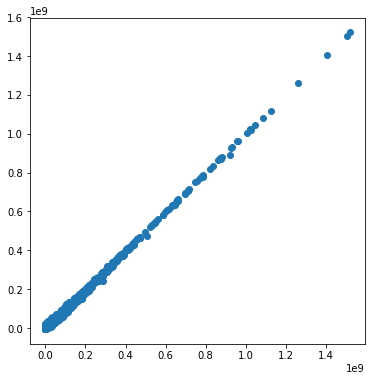

In [547]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 6))
plt.scatter(y, train_predict)
plt.plot(range(10, 15), range(10, 15), color="red")

In [548]:
test_predict= xgbr.predict(test) 

In [549]:
ss=pd.read_csv('test.csv')
ids = ss['id']

submission_file = open("TMDB.csv", "w")

import csv as csv

open_file_object = csv.writer(submission_file)

# Write the header of the csv
open_file_object.writerow(["Id","revenue"])

# Write the rows of the csv
open_file_object.writerows(zip(ids, test_predict))

# Close the file
submission_file.close()
